In [1]:
!pip install geopandas libpysal spopt matplotlib
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import libpysal
from spopt.region import WardSpatial

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/be/82/79e02a0e5dd4aca81894842b9d6522624a40048a913c6384efb2987a4144/geopandas-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for libpysal from https://files.pythonhosted.org/packages/59/c0/aea9a0b0d180f51d742428f211eafe7bf72139589fb2f484839e7d39efca/libpysal-4.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for spopt from https://files.pythonhosted.org/packages/ee/59/08e1796f4dda22a780254ad24c525dd4641daee86a3f5212c807b4a55c4a/spopt-0.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/a0/d1/035667f23d8e7066471c500636e9ee77b159a9d92f32b5e4944d541aad69/pyogrio-0.11.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pyproj>=3.5.0 from https://files.pythonhosted.org/packages/25/9d/cbaf82cfb290d1f1fa42feb9ba9464013bb3891e40c4199f8072112e4589/pyproj-3.7.

In [2]:
# Load the shapefile
tracts_gdf = gpd.read_file("../data/Stocking_CT_HVI_2015_shp/Stocking_CT_HVI_2015.shp")
tracts_gdf = tracts_gdf.reset_index(drop=True)

tracts_gdf

,OBJECTID,BoroName,BoroCT2010,PUMA,NTAName,NTACode,Shape_Leng,Borough,ONENYC_HVI,QUINTILES,...,stem_count,stump_coun,stocking_p,max_trees,trees_to_a,stocking_1,trees_to_1,Shape_Le_1,Shape_Area,geometry
0,1,Staten Island,5000900,3903,West New Brighton-New Brighton-St. George,SI22,7729.016600,5,-3.258102,1,...,269,6,0.236798,381,118,0.689928,83,7729.017000,2.497010e+06,"POLYGON ((962269.126 173705.5, 962288.722 1736..."
1,2,Staten Island,5002700,3903,Stapleton-Rosebank,SI37,6745.559749,5,-0.277956,3,...,295,14,0.056716,323,42,0.868940,30,6745.559452,2.703296e+06,"POLYGON ((964113.902 166065.145, 963758.874 16..."
2,3,Staten Island,5002900,3903,Stapleton-Rosebank,SI37,10895.072439,5,-0.450569,3,...,544,9,0.447322,767,232,0.697820,162,10895.072880,5.669697e+06,"POLYGON ((962886.012 165226.981, 962681.743 16..."
3,4,Staten Island,5003300,3903,Grymes Hill-Clifton-Fox Hills,SI08,18603.925061,5,-5.601794,1,...,354,10,0.798289,825,481,0.417008,337,18603.925305,9.204626e+06,"POLYGON ((961654.039 168922.613, 961563.675 16..."
4,5,Staten Island,5003900,3903,Grymes Hill-Clifton-Fox Hills,SI08,11523.702272,5,-6.500620,1,...,334,3,0.236315,478,147,0.692722,103,11523.701917,6.288130e+06,"POLYGON ((958133.603 164336.517, 958069.102 16..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2166,Bronx,2042500,3706,Norwood,BX43,8354.344207,2,0.389436,3,...,379,9,-0.196753,423,53,0.873928,37,8354.344469,3.156265e+06,"POLYGON ((1018124.39 257773.945, 1018159.774 2..."
2162,1828,Staten Island,5990100,3901,park-cemetery-etc-Staten Island,SI99,4743.128085,5,0.000000,0,...,0,0,0.000000,0,0,0.000000,0,4743.127833,6.357020e+05,"MULTIPOLYGON (((969488.166 149753.595, 969232...."
2163,1957,Queens,4061302,4110,Ridgewood,QN20,10370.460791,4,0.000000,0,...,0,0,0.000000,0,0,0.000000,0,10370.460688,5.511491e+06,"POLYGON ((1017275.562 196679.17, 1017026.931 1..."
2164,2013,Manhattan,1024000,3804,park-cemetery-etc-Manhattan,MN99,24946.501348,1,0.000000,0,...,0,0,0.000000,0,0,0.000000,0,24946.458848,2.346644e+07,"POLYGON ((1004410.678 229781.419, 1004405.724 ..."


In [3]:
print(tracts_gdf.columns)

Index(['OBJECTID', 'BoroName', 'BoroCT2010', 'PUMA', 'NTAName', 'NTACode',
       'Shape_Leng', 'Borough', 'ONENYC_HVI', 'QUINTILES', 'PGI', 'PGI_Percen',
       'PGI_High_L', 'tract_code', 'stem_count', 'stump_coun', 'stocking_p',
       'max_trees', 'trees_to_a', 'stocking_1', 'trees_to_1', 'Shape_Le_1',
       'Shape_Area', 'geometry'],
      dtype='object')


In [4]:
# Make sure your GeoDataFrame has a CRS
if tracts_gdf.crs is None:
    tracts_gdf.set_crs(epsg=4326, inplace=True)

# Reproject to projected CRS for distance-based weights
tracts_gdf = tracts_gdf.to_crs(epsg=2263)  # NY State Plane feet

In [5]:
stocking_deficit = tracts_gdf['stocking_p']
pgi = tracts_gdf['PGI']
hvi_scores = tracts_gdf["QUINTILES"]

# **MODEL WITHOUT CBS**

In [6]:
from spopt.region import MaxPHeuristic
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop islands and reset index
tracts_gdf = tracts_gdf.reset_index(drop=True)

# Create spatial weights
w = libpysal.weights.Rook.from_dataframe(tracts_gdf, use_index=False)
w.transform = "r"

# Feature for balancing (number of trees to plant)
attrs_name = ['trees_to_a']
threshold_name = 'trees_to_a'
attrs = tracts_gdf[['trees_to_a']].values

# You can standardize features if adding others, but here we use trees_to_a directly
# Set a floor (minimum value per region). Choose it as:
# total_trees_to_plant / desired_n_clusters
n_clusters_target = 420
total_trees_to_plant = tracts_gdf['trees_to_a'].sum()
target = total_trees_to_plant / n_clusters_target  # for 420 zones

model = MaxPHeuristic(
    gdf=tracts_gdf,
    w=w,
    attrs_name=attrs_name,
    threshold_name = threshold_name,
    threshold= target - 150,
    top_n=30,  # speed-vs-accuracy tradeoff; increase for more precision
    verbose=True
)

model.solve()

tracts_gdf['maxp_cluster'] = model.labels_


/Applications/anaconda3/lib/python3.11/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 1460, 1801, 2162.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 1460, ' is an island (no neighbors)')
('WARNING: ', 1801, ' is an island (no neighbors)')
('WARNING: ', 2162, ' is an island (no neighbors)')
max_p:  410
number of good partitions: 1
0
total_within_region_distance after SA: 
229759.0
total_within_region_distance after SA: 
224316.0
total_within_region_distance after SA: 
228524.0
total_within_region_distance after SA: 
227598.0
total_within_region_distance after SA: 
228260.0
total_within_region_distance after SA: 
224890.0
total_within_region_distance after SA: 
224272.0
total_within_region_distance after SA: 
228801.0
total_within_region_distance after SA: 
228534.0
total_within_region_distance after SA: 
223290.0
best objective value:
223290.0


In [7]:
print(target)

566.7761904761904


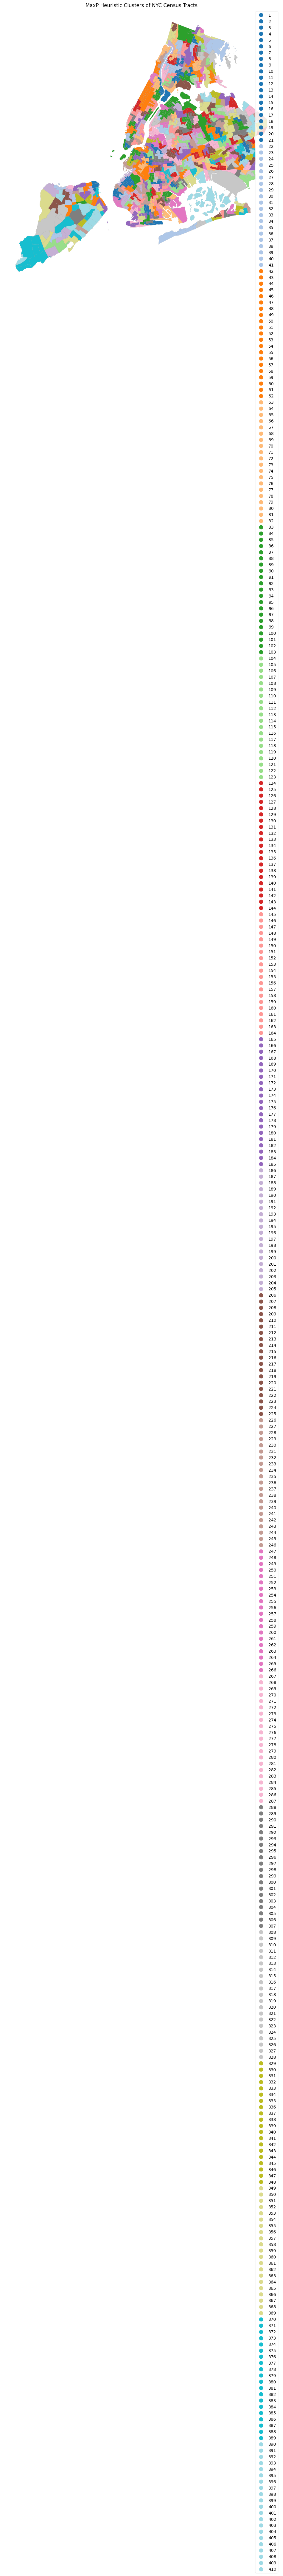

In [8]:
import matplotlib.pyplot as plt

# Plot the tracts colored by cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

tracts_gdf.plot(column='maxp_cluster',
                categorical=True,
                legend=True,
                cmap='tab20',
                linewidth=0.1,
                edgecolor='gray',
                ax=ax)

ax.set_title("MaxP Heuristic Clusters of NYC Census Tracts")
ax.axis('off')

plt.show()

In [9]:
# Compute total trees_to_a per cluster
cluster_sums = tracts_gdf.groupby("maxp_cluster")["trees_to_a"].sum().sort_values(ascending=False)
print(cluster_sums.describe())  # To see range/spread

count     410.000000
mean      580.600000
std       189.399026
min       417.000000
25%       449.250000
50%       521.500000
75%       646.750000
max      2104.000000
Name: trees_to_a, dtype: float64


In [9]:
# Print neighbors only for tracts that are NOT islands
non_island_ids = [nid for nid in w.neighbors.keys() if nid not in w.islands]

print(f"Number of non-island tracts: {len(non_island_ids)}")

for tract_id in non_island_ids[:20]:  # just first 20 for sanity check
    neighbors = w.neighbors[tract_id]
    print(f"Tract {tract_id} neighbors: {neighbors}")

Number of non-island tracts: 2163
Tract 0 neighbors: [1904, 1572, 693, 1573, 1895]
Tract 1 neighbors: [17, 2, 1473, 1663]
Tract 2 neighbors: [1, 17, 3, 1862, 1663]
Tract 3 neighbors: [1905, 2, 4, 1893, 1862, 1894, 1663]
Tract 4 neighbors: [3, 1893, 1862]
Tract 5 neighbors: [1880, 8, 1852, 1677]
Tract 6 neighbors: [2112, 1892, 1863, 2072, 1594]
Tract 7 neighbors: [2112, 2072]
Tract 8 neighbors: [1873, 1874, 20, 5, 1880, 1772]
Tract 9 neighbors: [1920, 1866, 1908, 1783]
Tract 10 neighbors: [1897, 1450, 21, 1898]
Tract 11 neighbors: [2104, 1860, 1430, 1871]
Tract 12 neighbors: [1872, 1880, 1866, 1867, 1870]
Tract 13 neighbors: [2152, 1870, 1866, 14]
Tract 14 neighbors: [2152, 13, 1870, 15]
Tract 15 neighbors: [1870, 2151, 2152, 1773, 14]
Tract 16 neighbors: [1854, 18, 19, 1902, 1887]
Tract 17 neighbors: [1, 2, 1473, 1862, 1887, 1853, 1903]
Tract 18 neighbors: [16, 1593, 1338, 1887]
Tract 19 neighbors: [16, 1338, 1854]


# **MODEL WITH CBS**

In [10]:
from spopt.region import Skater
from sklearn.preprocessing import StandardScaler
from libpysal.weights import Rook

# get tracts in one CB
cb_id = 1
cb_tracts = tracts_gdf[tracts_gdf['Community Board'] == cb_id].copy()

# Create weights (Rook contiguity)
temp_w = Rook.from_dataframe(tracts_gdf, use_index=False)
temp_w.transform = "r"
islands = temp_w.islands

cb_tracts = cb_tracts.drop(islands).reset_index(drop=True)

w = Rook.from_dataframe(cb_tracts, use_index=False)
w.transform = "r"

total_trees_to_plant = cb_tracts['trees_to_a'].sum()
# Number of clusters you want
target_trees_per_cluster = 330

# target total clusters = 330, 59 CBs -> 5.5 zones per CB
n_clusters = max(3, int(total_trees_to_plant / target_trees_per_cluster))

# Features to use (e.g., context variables if any)
features = tracts_gdf[['trees_to_a']].fillna(0)

# Normalize features (recommended)
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

# Initialize and solve
model = Skater(gdf = tracts_gdf,
    w = w,
    n_clusters=n_clusters,
    attrs_name=list(features.columns),
)
model.solve()

# Assign labels
tracts_gdf["zone_id"] = model.labels_


KeyError: 'Community Board'

In [ ]:
cb_tracts.plot(column="zone_id", cmap="tab20", legend=True, figsize=(10, 10))
